In [1]:
# ========== 1. Import Required Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

In [2]:
# ========== 2. Load Cleaned Data ==========
df = pd.read_csv("../data/processed/merged_clean.csv")

print("Dataset Shape:", df.shape)

Dataset Shape: (1000, 11)


In [3]:
print("\nFirst Few Rows:")
display(df.head())


First Few Rows:


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,price_change_24h
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,16-03-2022,0.045903,12.257838
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,16-03-2022,0.060374,0.933099
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,16-03-2022,0.724503,-0.000010
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,16-03-2022,0.021795,0.107360
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,16-03-2022,0.074150,0.000000


In [4]:
print("\nData Info:")
display(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coin              1000 non-null   object 
 1   symbol            1000 non-null   object 
 2   price             1000 non-null   float64
 3   1h                1000 non-null   float64
 4   24h               1000 non-null   float64
 5   7d                1000 non-null   float64
 6   24h_volume        1000 non-null   float64
 7   mkt_cap           1000 non-null   float64
 8   date              1000 non-null   object 
 9   liquidity_ratio   1000 non-null   float64
 10  price_change_24h  1000 non-null   float64
dtypes: float64(8), object(3)
memory usage: 86.1+ KB


None

In [5]:
df['liquidity_score'] = (df['24h_volume'] / df['mkt_cap']).fillna(0)

In [6]:
# liquidity score
df['liquidity_score'] = (df['24h_volume'] / df['mkt_cap']).fillna(0)

In [7]:
print("\n✅ Feature Engineering Completed!")
print("\nNew Features Created:")
display(df.columns.tolist())


✅ Feature Engineering Completed!

New Features Created:


['coin',
 'symbol',
 'price',
 '1h',
 '24h',
 '7d',
 '24h_volume',
 'mkt_cap',
 'date',
 'liquidity_ratio',
 'price_change_24h',
 'liquidity_score']

In [8]:
print("\nMissing Values After Feature Engineering:")
print(df.isnull().sum())


Missing Values After Feature Engineering:
coin                0
symbol              0
price               0
1h                  0
24h                 0
7d                  0
24h_volume          0
mkt_cap             0
date                0
liquidity_ratio     0
price_change_24h    0
liquidity_score     0
dtype: int64


In [9]:
# ========== 4. Handle Missing and Infinite Values ==========
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean(numeric_only=True))

In [10]:
print("\nMissing Values After Feature Engineering:")
print(df.isnull().sum())


Missing Values After Feature Engineering:
coin                0
symbol              0
price               0
1h                  0
24h                 0
7d                  0
24h_volume          0
mkt_cap             0
date                0
liquidity_ratio     0
price_change_24h    0
liquidity_score     0
dtype: int64


In [11]:
# ========== 5. Feature Statistics ==========
print("\n" + "="*50)
print("Feature Statistics:")
print("="*50)

display(df.describe())


Feature Statistics:


,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio,price_change_24h,liquidity_score
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000
mean,6.561060e+02,0.009697,0.023683,0.023366,2.873441e+08,3.755304e+09,0.103574,1.383848e-01,0.103574
std,4.584655e+03,0.026842,0.059098,0.228869,2.760286e+09,3.803783e+10,0.365656,1.119339e+00,0.365656
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,0.000000,-3.272726e+00,0.000000
25%,1.940547e-01,0.001000,0.001000,-0.040250,1.842994e+06,1.157776e+08,0.008833,4.474824e-09,0.008833
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08,0.034154,7.817336e-05,0.034154
75%,7.232500e+00,0.019000,0.035000,0.036000,3.923430e+07,5.948436e+08,0.088351,1.326500e-03,0.088351
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,5.948545,1.607474e+01,5.948545


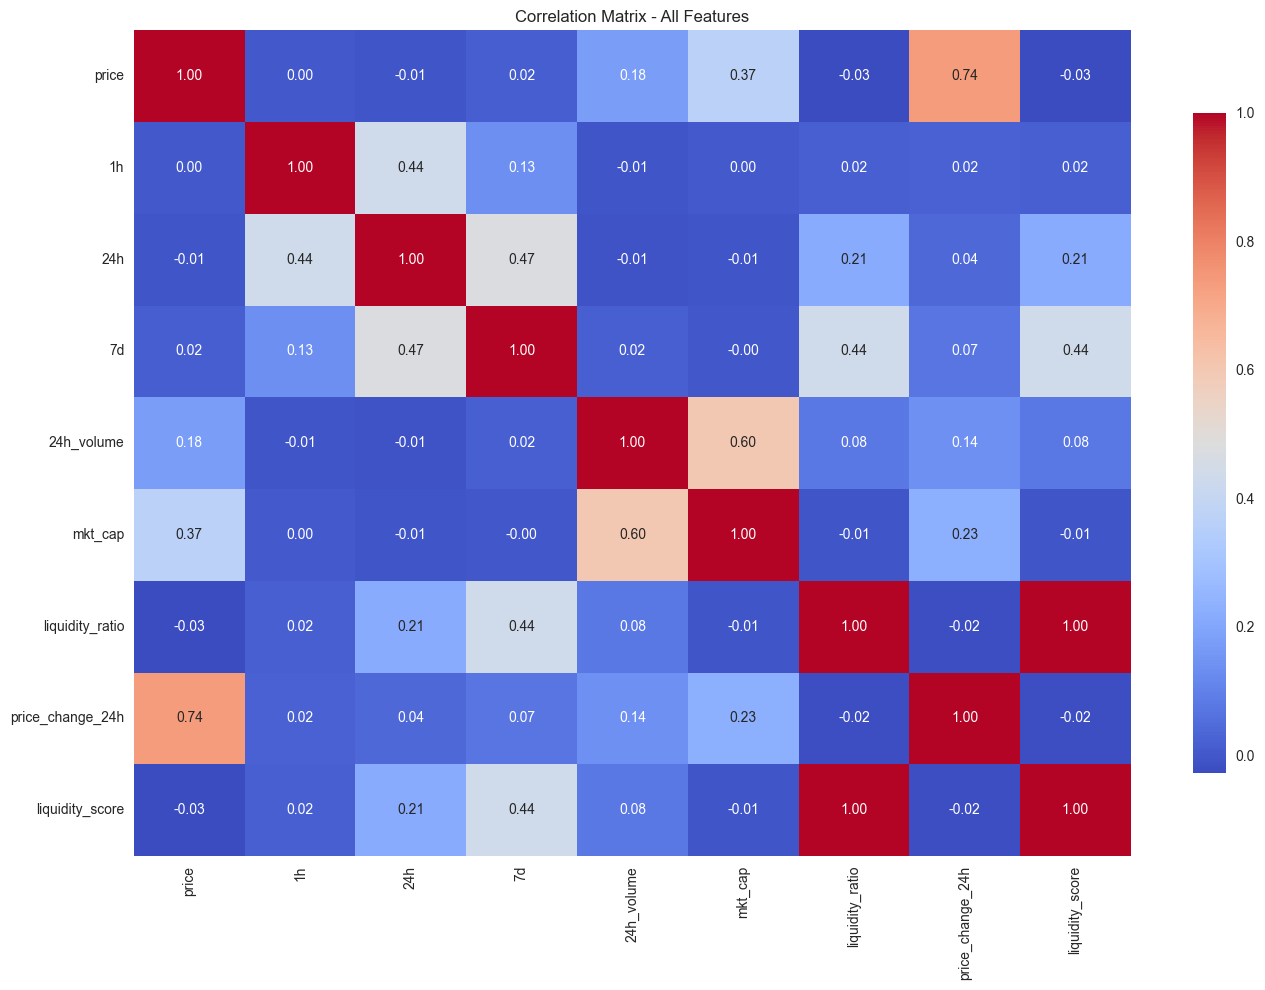

In [12]:
# ========== 6. Correlation Analysis ==========
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix - All Features")
plt.tight_layout()
plt.show()

In [13]:
# Check data types
print("\nData Types of Features:")
display(df.dtypes)


Data Types of Features:


coin                 object
symbol               object
price               float64
1h                  float64
24h                 float64
7d                  float64
24h_volume          float64
mkt_cap             float64
date                 object
liquidity_ratio     float64
price_change_24h    float64
liquidity_score     float64
dtype: object

In [14]:
# ========== 7. Save Engineered Features ==========
df.to_csv("../data/processed/engineered_features.csv", index=False)
print("\n✅ Engineered features saved to data/processed/engineered_features.csv")


✅ Engineered features saved to data/processed/engineered_features.csv


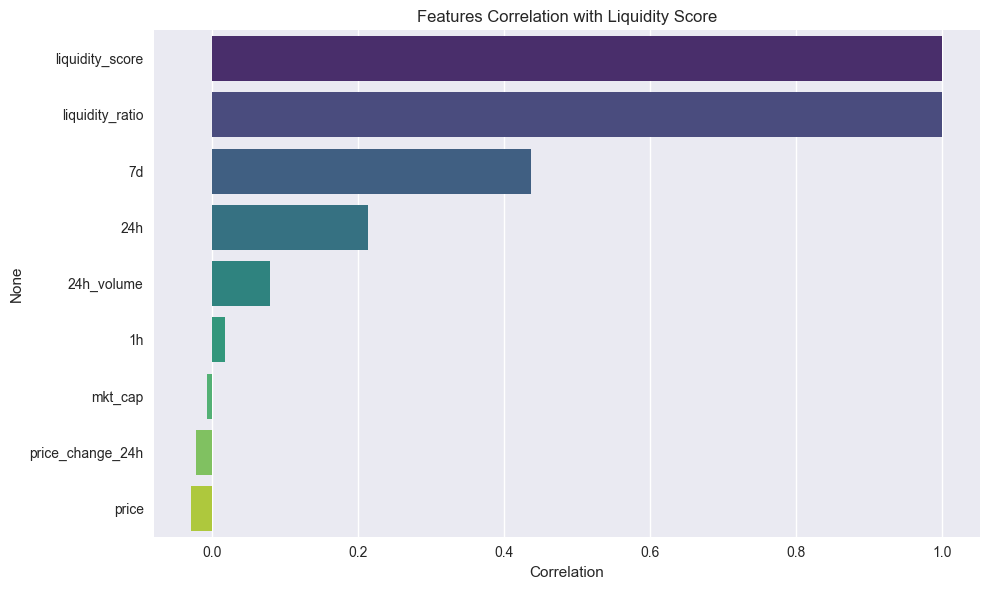

In [17]:
# ========== 8. Feature Correlation Subset ==========
# Top features correlated with liquidity
plt.figure(figsize=(10, 6))
liquidity_corr = numeric_df.corr()['liquidity_score'].sort_values(ascending=False)
sns.barplot(x=liquidity_corr.values, y=liquidity_corr.index, palette='viridis')
plt.title('Features Correlation with Liquidity Score')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

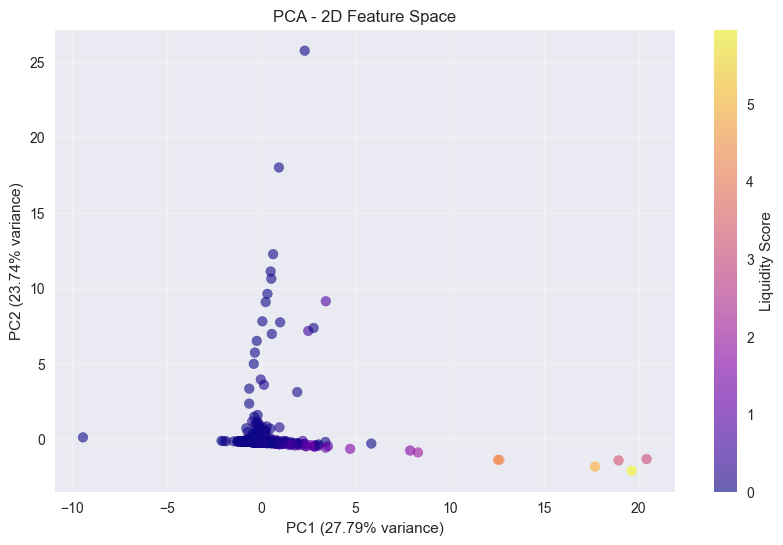

In [18]:
# ========== 9. PCA Visualization ==========
from sklearn.preprocessing import StandardScaler

# Select numeric features for PCA
numeric_features = df.select_dtypes(include=np.number).columns
X_scaled = StandardScaler().fit_transform(df[numeric_features])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['liquidity_score'], cmap='plasma', alpha=0.6)
plt.colorbar(scatter, label='Liquidity Score')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA - 2D Feature Space')
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
print(f"\n✅ Visualizations Complete!")
print(f"Total variance explained by 2 PCs: {sum(pca.explained_variance_ratio_):.2%}")


✅ Visualizations Complete!
Total variance explained by 2 PCs: 51.53%
